 <Trend Analysis>
* Capomulin statistically significant decreases tumor volumn compared to placebo, Infubinol and Ketapril.
* Metastasis is statistically significant lower under 45-days Capomulin treatment.
* Survival rate is higher in Capomulin arm as well.
* Over 45 days Capomulin treament, tumor volumn decareses by about 20%.  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [2]:
# Read 2 data frame
mouse= "raw_data/mouse_drug_data.csv"
trial= "raw_data/clinicaltrial_data.csv"
mouse_df = pd.read_csv(mouse)
trial_df = pd.read_csv(trial)

In [3]:
# Merge 2 data frame
merge_mouseID_df = pd.merge(mouse_df, trial_df, how='outer', on='Mouse ID')
merge_mouseID_df.head(5)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [4]:
# Mean of Tumor volumen is grouped by Drug & Timepoint
# Choose interested drugs
group_drug1= merge_mouseID_df.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)": "mean"})
stacked_group_drug1 = group_drug1.reset_index().pivot(index="Timepoint", columns="Drug", values= "Tumor Volume (mm3)")
drugs_interested = stacked_group_drug1.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis=1)
drugs_interested

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


In [5]:
# SEM of Tumor volumen is grouped by Drug & Timepoint
# Choose interested drugs
group_drug2= merge_mouseID_df.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)": "sem"})
group_drug2.columns=["Errors"]
stacked_group_drug2 = group_drug2.reset_index().pivot(index="Timepoint", columns="Drug", values= "Errors")
drugs_interested_error= stacked_group_drug2.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis=1)
drugs_interested_error

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


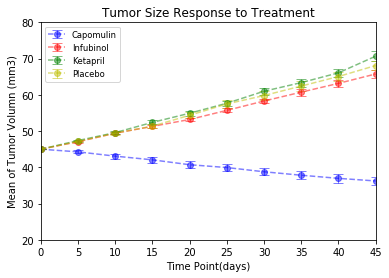

In [6]:
# Plot for tumor size change 
fig, ax = plt.subplots()
c_means= drugs_interested.iloc[:, 0]
c_sem= drugs_interested_error.iloc[:, 0]
i_means= drugs_interested.iloc[:, 1]
i_sem= drugs_interested_error.iloc[:, 1]
k_means= drugs_interested.iloc[:, 2]
k_sem= drugs_interested_error.iloc[:, 2]
p_means= drugs_interested.iloc[:, 3]
p_sem= drugs_interested_error.iloc[:, 3]

ax.errorbar(drugs_interested.index, c_means, c_sem, fmt="o--", color="b",
            alpha=0.5, label="Capomulin", elinewidth = 1, capthick = 1, capsize = 5)
ax.errorbar(drugs_interested.index, i_means, i_sem, fmt="o--", color="r",
            alpha=0.5, label="Infubinol", elinewidth = 1, capthick = 1, capsize = 5)
ax.errorbar(drugs_interested.index, k_means, k_sem, fmt="o--", color="g",
            alpha=0.5, label="Ketapril", elinewidth = 1, capthick = 1, capsize = 5)
ax.errorbar(drugs_interested.index, p_means, p_sem, fmt="o--", color="y",
            alpha=0.5, label="Placebo", elinewidth = 1, capthick = 1, capsize = 5)

ax.set_xlim(0, 45)
ax.set_ylim(20, 80)
plt.title('Tumor Size Response to Treatment')
ax.set_xlabel("Time Point(days)")
ax.set_ylabel("Mean of Tumor Volumn (mm3)")

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()


In [7]:
# Mean of metastatic site is grouped by Drug & Timepoint
# Choose interested drugs
group_drug3= merge_mouseID_df.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites": "mean"})
stacked_group_drug3 = group_drug3.reset_index().pivot(index="Timepoint", columns="Drug", values= "Metastatic Sites")
drugs_interested_mets = stacked_group_drug3.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis=1)
drugs_interested_mets

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [8]:
# SEM of mets sites is grouped by Drug & Timepoint
# Choose interested drugs
group_drug4= merge_mouseID_df.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites": "sem"})
group_drug4.columns=["Errors"]
stacked_group_drug4 = group_drug4.reset_index().pivot(index="Timepoint", columns="Drug", values= "Errors")
drugs_interested_metserror= stacked_group_drug4.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis=1)
drugs_interested_metserror

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


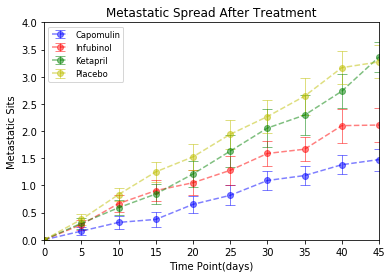

In [9]:
# Plot for mets sites change 
fig, ax = plt.subplots()
c_means_m= drugs_interested_mets.iloc[:, 0]
c_sem_m= drugs_interested_metserror.iloc[:, 0]
i_means_m= drugs_interested_mets.iloc[:, 1]
i_sem_m= drugs_interested_metserror.iloc[:, 1]
k_means_m= drugs_interested_mets.iloc[:, 2]
k_sem_m= drugs_interested_metserror.iloc[:, 2]
p_means_m= drugs_interested_mets.iloc[:, 3]
p_sem_m= drugs_interested_metserror.iloc[:, 3]

ax.errorbar(drugs_interested_mets.index, c_means_m, c_sem_m, fmt="o--", color="b",
            alpha=0.5, label="Capomulin", elinewidth = 1, capthick = 1, capsize = 5)
ax.errorbar(drugs_interested_mets.index, i_means_m, i_sem_m, fmt="o--", color="r",
            alpha=0.5, label="Infubinol", elinewidth = 1, capthick = 1, capsize = 5)
ax.errorbar(drugs_interested_mets.index, k_means_m, k_sem_m, fmt="o--", color="g",
            alpha=0.5, label="Ketapril", elinewidth = 1, capthick = 1, capsize = 5)
ax.errorbar(drugs_interested_mets.index, p_means_m, p_sem_m, fmt="o--", color="y",
            alpha=0.5, label="Placebo", elinewidth = 1, capthick = 1, capsize = 5)

ax.set_xlim(0, 45)
ax.set_ylim(0, 4)
plt.title('Metastatic Spread After Treatment')
ax.set_xlabel("Time Point(days)")
ax.set_ylabel("Metastatic Sits")

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()


In [10]:
# Count available data in Mouse ID for survival
group_drug5= merge_mouseID_df.groupby(["Drug", "Timepoint"]).agg({"Mouse ID": "count"})
stacked_group_drug5 = group_drug5.reset_index().pivot(index="Timepoint", columns="Drug", values= "Mouse ID")
drugs_interested_sur = stacked_group_drug5.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis=1)
drugs_interested_sur

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


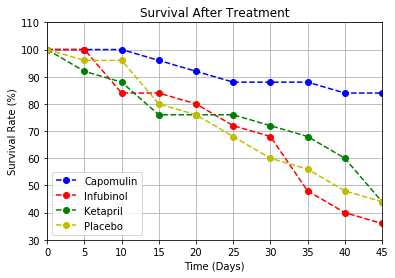

In [11]:
# Plot for survival

plt.plot(drugs_interested_sur.index, drugs_interested_sur['Capomulin']/drugs_interested_sur['Capomulin'][0]*100,
             'o--', label='Capomulin', color="b")
plt.plot(drugs_interested_sur.index, drugs_interested_sur['Infubinol']/drugs_interested_sur['Infubinol'][0]*100,
             'o--', label='Infubinol', color="r")
plt.plot(drugs_interested_sur.index, drugs_interested_sur['Ketapril']/drugs_interested_sur['Ketapril'][0]*100,
             'o--', label='Ketapril', color="g")
plt.plot(drugs_interested_sur.index, drugs_interested_sur['Placebo']/drugs_interested_sur['Placebo'][0]*100,
             'o--', label='Placebo', color="y")

plt.title('Survival After Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc = 'best')
plt.xlim(0, 45)
plt.ylim(30, 110)
plt.grid()
plt.show()



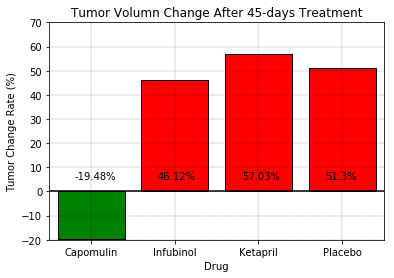

In [21]:
# Make a new dataframe and Calculate % of tumor volumn change 
mean_chang = []
mean_change = round((drugs_interested.iloc[9,:]-drugs_interested.iloc[0,:])/(drugs_interested.iloc[0,:])*100,2)
new_df = pd.DataFrame(mean_change)
new_df.reset_index(inplace = True)
new_df.columns=["Drug","% of tumor volumn change"]

# Generate bar chart
x_axis = new_df["Drug"]
plt.bar(x_axis, mean_change, color=['g', 'r', 'r', 'r'], alpha=1, edgecolor = 'black')
plt.grid(color = 'black', linestyle='--', linewidth=0.2)
plt.axhline(y=0, color='black', linestyle='-')
plt.title("Tumor Volumn Change After 45-days Treatment")
plt.xlabel("Drug")
plt.ylabel("Tumor Change Rate (%)")
plt.legend(loc = "best")
plt.xlim(-0.5, 3.5)
plt.ylim(-20, 70)
for x in range(0, 4):
    plt.text(x-0.2, 5, str(mean_change[x])+'%', color = 'black')
plt.show()
